#### Imports

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt

#### Reading the dataset

In [69]:
dataset = pd.read_csv("Wine Quality/winequality-red.csv", sep=';')

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Data Preprocessing

In [71]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']]
y = dataset['quality']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.24778761, 0.39726027, 0.        , 0.13772455, 0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.20958084, 0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.19161677, 0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , 0.25149701, 0.4       ],
       [0.11504425, 0.35958904, 0.12      , 0.22754491, 0.27692308],
       [0.12389381, 0.13013699, 0.47      , 0.19760479, 0.4       ]])

#### Split data into training and testing sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)

(1599, 5)
(1599,)


#### Fitting the data into a Logistic Regression model

In [73]:
model = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')

model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

#### Evaluating the model

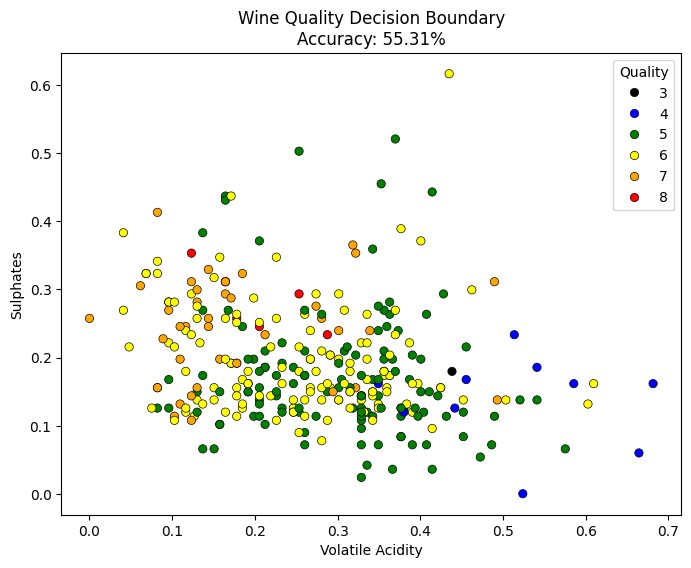

In [74]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test[:, 1], 
    y=X_test[:, 3], 
    hue=y_test, 
    palette={3: 'black', 4: 'blue', 5: 'green', 6: 'yellow', 7: 'orange', 8: 'red'},
    edgecolor='black')
plt.xlabel("Volatile Acidity")
plt.ylabel("Sulphates")
plt.title("Wine Quality Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Quality", loc="upper right")
plt.show()


#### Visualizing the model performance using a heatmap

Text(70.72222222222221, 0.5, 'Actual Values')

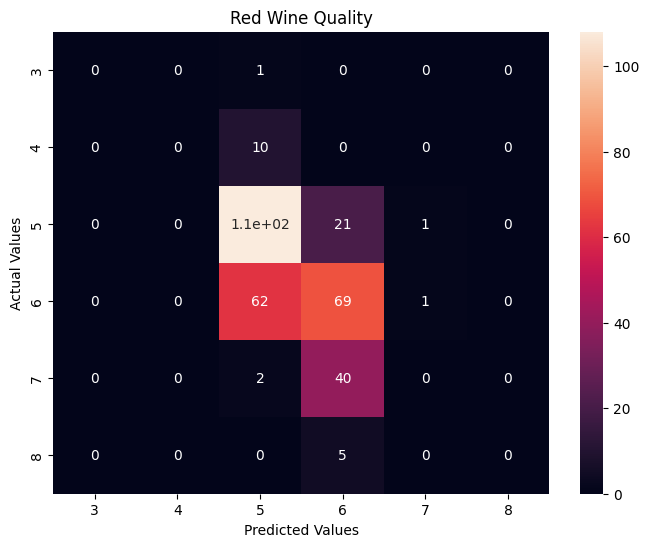

In [75]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    index=[3, 4, 5, 6, 7, 8],
    columns=[3, 4, 5, 6, 7, 8])

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Red Wine Quality')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
